<a href="https://colab.research.google.com/github/wigneshh/NLP/blob/main/Assignment_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Load data fromkeras.datasets and perform following computational analysis:- [CO3]
(a) Preprocessing of the Data

(b) Divide data into training and testing data set

(c) Build the Gated Recurrent Units (GRU) Model

(d) Training the GRU Model

(e) Text Generation Using the Trained Model

 (f)  Evaluate Model’s accuracy






In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import imdb

max_features = 10000
maxlen = 100
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

model = Sequential()
model.add(Embedding(max_features, 128))
model.add(GRU(128, return_sequences=False))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

batch_size = 128
epochs = 1

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test))

def generate_text(seed_text, next_words, model, max_sequence_len):
    for _ in range(next_words):
        token_list = imdb.get_word_index(seed_text)
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted = np.argmax(model.predict(token_list), axis=-1)
        output_word = ""
        for word, index in imdb.get_word_index().items():
            if index == predicted:
                output_word = word
                break
        seed_text += " " + output_word
    return seed_text

test_loss, test_acc = model.evaluate(x_test, y_test)

print(f"Test accuracy: {test_acc}")


196/196 ━━━━━━━━━━━━━━━━━━━━ 62s 306ms/step - accuracy: 0.6480 - loss: 0.6137 - val_accuracy: 0.8294 - val_loss: 0.3954
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.8302 - loss: 0.3958
Test accuracy: 0.8294399976730347



2.Compare accuracy of Long sort term memory and Gated recurrent Unit models for text generation using data from tensorflow.keras.datasets. [CO3]

In [8]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Embedding
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import imdb

max_features = 10000
max_len = 200
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)


x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)


def build_gru_model():
    model = Sequential()
    model.add(Embedding(max_features, 128, input_length=max_len))
    model.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


def build_lstm_model():
    model = Sequential()
    model.add(Embedding(max_features, 128, input_length=max_len))
    model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

gru_model = build_gru_model()
gru_history = gru_model.fit(x_train, y_train, batch_size=64, epochs=3, validation_split=0.2)
gru_test_loss, gru_test_acc = gru_model.evaluate(x_test, y_test)

lstm_model = build_lstm_model()
lstm_history = lstm_model.fit(x_train, y_train, batch_size=64, epochs=3, validation_split=0.2)
lstm_test_loss, lstm_test_acc = lstm_model.evaluate(x_test, y_test)

print(f"GRU Test Accuracy: {gru_test_acc:.4f}")
print(f"LSTM Test Accuracy: {lstm_test_acc:.4f}")

Epoch 1/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 102s 318ms/step - accuracy: 0.6127 - loss: 73939080.0000 - val_accuracy: 0.6640 - val_loss: 0.6056
Epoch 2/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 101s 324ms/step - accuracy: 0.7413 - loss: 37450.8008 - val_accuracy: 0.6780 - val_loss: 0.5825
Epoch 3/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 141s 322ms/step - accuracy: 0.7855 - loss: 23327.1328 - val_accuracy: 0.6820 - val_loss: 0.5788
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 33ms/step - accuracy: 0.6886 - loss: 0.5783
Epoch 1/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 107s 337ms/step - accuracy: 0.6856 - loss: 0.5815 - val_accuracy: 0.7812 - val_loss: 0.4570
Epoch 2/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 142s 338ms/step - accuracy: 0.8572 - loss: 0.3419 - val_accuracy: 0.8504 - val_loss: 0.3579
Epoch 3/3
313/313 ━━━━━━━━━━━━━━━━━━━━ 109s 347ms/step - accuracy: 0.8909 - loss: 0.2772 - val_accuracy: 0.8480 - val_loss: 0.3656
782/782 ━━━━━━━━━━━━━━━━━━━━ 51s 66ms/step - accuracy: 0.8439 - loss: 0.3704
GRU Test Accuracy: 0.6891
LSTM Test Accuracy:

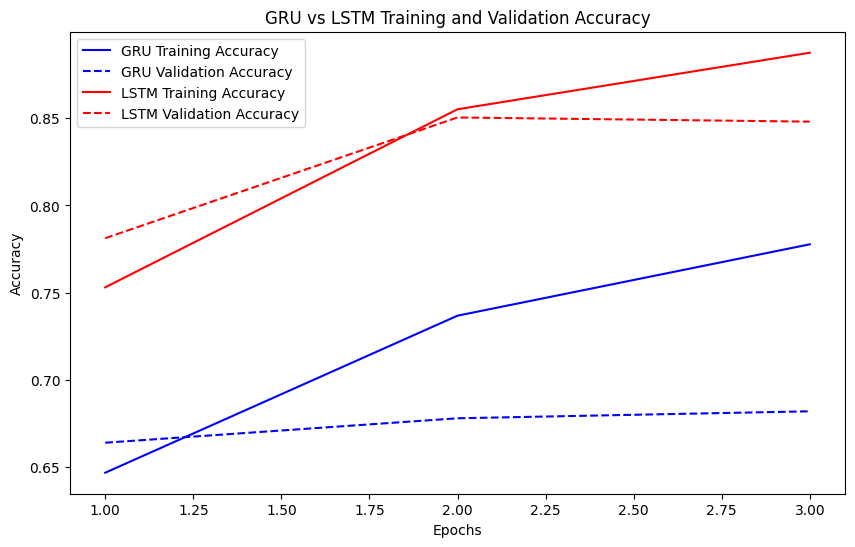

In [9]:
import matplotlib.pyplot as plt


gru_acc = gru_history.history['accuracy']
gru_val_acc = gru_history.history['val_accuracy']

lstm_acc = lstm_history.history['accuracy']
lstm_val_acc = lstm_history.history['val_accuracy']


epochs = range(1, len(gru_acc) + 1)

plt.figure(figsize=(10, 6))

plt.plot(epochs, gru_acc, 'b', label='GRU Training Accuracy')
plt.plot(epochs, gru_val_acc, 'b--', label='GRU Validation Accuracy')


plt.plot(epochs, lstm_acc, 'r', label='LSTM Training Accuracy')
plt.plot(epochs, lstm_val_acc, 'r--', label='LSTM Validation Accuracy')

plt.title('GRU vs LSTM Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()